## Special Skript for the 20220412 Emergence Experiment

In [1]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.superconjugation_class import Superconjugation
from evaluation_scripts.style import Style
import matplotlib.pyplot as plt
from evaluation_scripts.oneway import OneWaySignificance
import os

In [2]:
style = Style(fontsize = 20, figsize = (12,6))
dark_style = Style("black", figsize = (12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [3]:
exp = "20220412"
alpha = .05
experiment = Experiment(exp)

In [4]:
exp = "20220412"
alpha = .05
experiment = Experiment(exp)
superconjugation = Superconjugation(experiment)
superconjugation.emergence_per_encounter()
superconjugation.encounter_frequencies()

## Superinfections

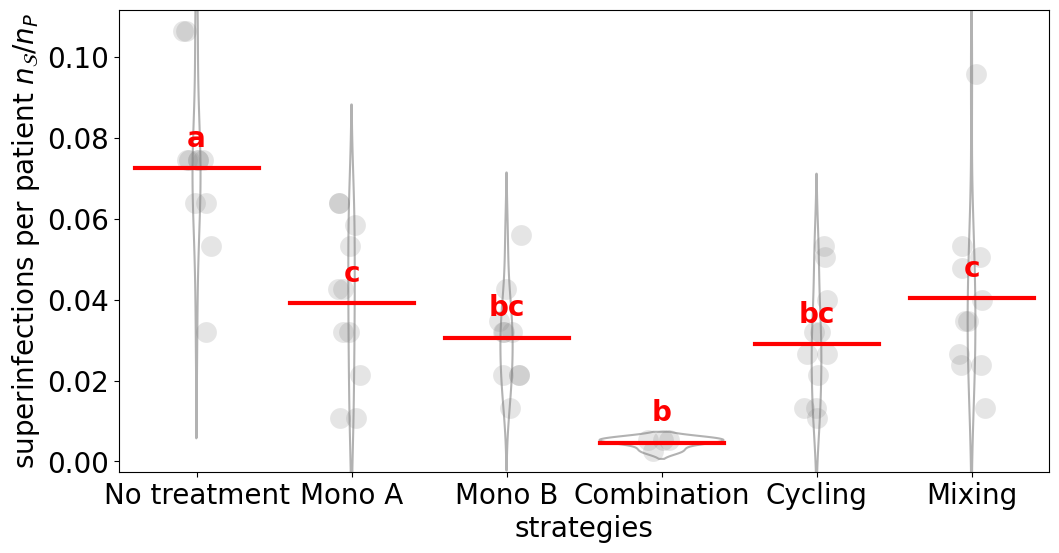

In [5]:
fig, ax = style.create_figure_with_style()
superinfections = OneWaySignificance(superconjugation.superinfections, "strategy", "f")
ax = superinfections.plot(order = experiment.strategies, strip = True, dot_color = "grey", ax = ax, jitter = 0.1)
ax.set_xlabel("strategies")  
ax.set_ylabel(r"superinfections per patient $n_\mathcal{S}/n_P$") 
experiment.save_figure("encounter_frequencies.pdf")
superinfections.write_anova_results(os.path.join(experiment.pathes["tables"], "superinfection_anova.tex"))
superinfections.write_tukey_results(os.path.join(experiment.pathes["tables"], "superinfection_tukey.tex"))

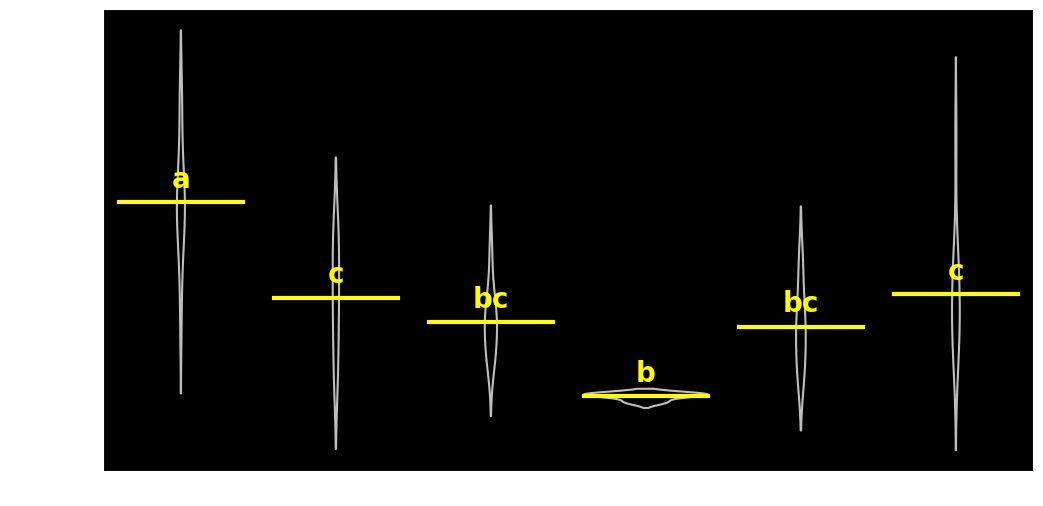

In [6]:
fig, ax = dark_style.create_figure_with_style()
ax = superinfections.plot(order = experiment.strategies, dot_color = "white", bar_color = "yellow", ax = ax, transparancy = .5)
ax.set_xlabel(None)  
ax.set_ylabel(r"superinfections per patient $\frac{n_\mathcal{S}}{n_P}$") 
experiment.save_figure("encounter_frequencies_dark.pdf")

## emergence per encounter
- each dot represents all wells treated with x on a plate

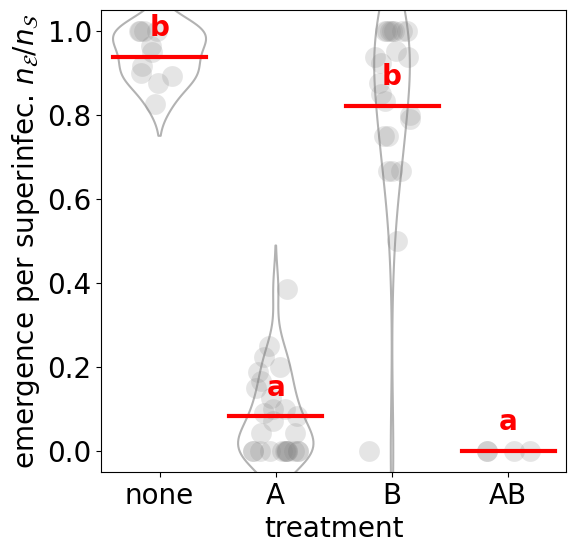

In [11]:
fig, ax = style.create_figure_with_style(figsize = (6,6))
emergence = OneWaySignificance(superconjugation.emergence_summary, "treatment_with", "f")
ax = emergence.plot( 
    dot_color = "grey", 
    order = ["none", "A", "B", "AB"], 
    order_col = "treatment_with", 
    ax = ax,
    strip = True,
    jitter = .2)
ax.set_xlabel(r"treatment")  
ax.set_ylabel(r"emergence per superinfec. $n_\mathcal{E}/n_\mathcal{S}$") 
experiment.save_figure("conjugation_prop.pdf")
emergence.write_anova_results(os.path.join(experiment.pathes["tables"], "treatment_emergence_anova.tex"))
emergence.write_tukey_results(os.path.join(experiment.pathes["tables"], "treatment_emergence_tukey.tex"))

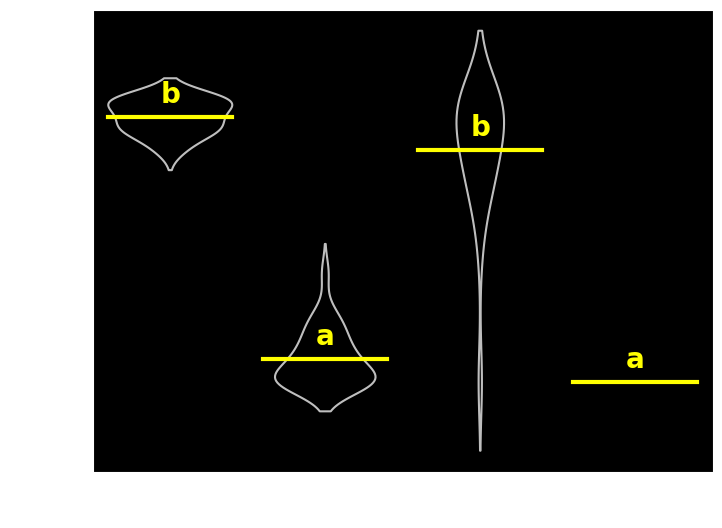

In [8]:
fig, ax = dark_style.create_figure_with_style(figsize = (8,6))
ax = emergence.plot(dot_color = "white", bar_color = "yellow", order = ["none", "A", "B", "AB"], transparancy = 0.5, order_col = "treatment_with", ax = ax)
ax.set_xlabel(r"treatment $\vartheta$")  
ax.set_ylabel(r"emergence per superinfection $\frac{n_\mathcal{E}}{n_\mathcal{S}}$") 
experiment.save_figure("conjugation_prop_dark.pdf")

## Create Expectations

In [9]:
superconjugation.calculate_expected_frequencies()
experiment.pickle_df(superconjugation.expectations, "expectations_emergence.pkl")
superconjugation.expectations

,f
No treatment,0.068075
Mono A,0.003213
Mono B,0.025131
Mixing,0.018244
Combination,0.000000
Cycling,0.011407
